<a href="https://colab.research.google.com/github/avnishnp/Deep-Learning/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:

X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:-5]

array([[6],
       [9],
       [9],
       ...,
       [0],
       [1],
       [0]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5060 - accuracy: 0.4595
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1433 - accuracy: 0.6000
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0077 - accuracy: 0.6525
Epoch 4/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9243 - accuracy: 0.6811
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8577 - accuracy: 0.7029
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8058 - accuracy: 0.7205
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7666 - accuracy: 0.7341
Epoch 8/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7251 - accuracy: 0.7493
Epoch 9/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.6918 - accuracy: 0.7592
Epoch 10/10
1563/1563 [==============================] - 66s 42m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9182 - accuracy: 0.6959


[0.9181684851646423, 0.695900022983551]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 14ms/step


array([[1.2890859e-04, 3.6240783e-06, 4.7227177e-03, 9.1189522e-01,
        4.6340847e-05, 7.3440596e-02, 2.3805522e-03, 8.1560633e-05,
        7.1913544e-03, 1.0915954e-04],
       [5.9067891e-03, 2.0790184e-01, 5.1651330e-07, 4.8613433e-08,
        6.5823414e-08, 2.6126510e-09, 3.1139709e-09, 6.9961828e-08,
        7.8597933e-01, 2.1142092e-04],
       [1.8193923e-02, 2.9598355e-02, 1.1495533e-03, 1.0780234e-02,
        1.5907611e-03, 3.6852912e-04, 1.9833775e-05, 4.4740774e-04,
        9.1779399e-01, 2.0057492e-02],
       [2.5774685e-01, 4.5954719e-01, 9.0353872e-04, 1.8432936e-04,
        3.4132381e-03, 9.9989247e-06, 2.1620574e-05, 3.5730484e-06,
        2.7648178e-01, 1.6878458e-03],
       [1.5666759e-05, 2.3870463e-05, 1.0722882e-02, 8.7265875e-03,
        3.6281043e-01, 2.0383170e-03, 6.1529607e-01, 2.7211066e-04,
        5.8789839e-05, 3.5228433e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 1, 6, 6, 1, 6, 3, 1]

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

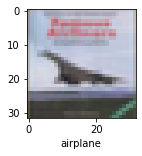

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'automobile'